In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import sys

def generate1():
    a = np.random.uniform(0, 1)
    b = np.random.uniform(0, 1)
    return (a * np.cos(2 * np.pi * b), a * np.sin(2 * np.pi * b))


def generate2():
    while True:
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        # if x ** 2 + y ** 2 > 1:
        #     continue
        return (x, y)

In [2]:
N_points = 1000
x_arr1, y_arr1 = [0] * N_points, [0] * N_points
x_arr2, y_arr2 = [0] * N_points, [0] * N_points
for i in range(N_points):
    x1, y1 = generate1()
    x_arr1[i] = x1
    y_arr1[i] = y1
    x2, y2 = generate2()
    x_arr2[i] = x2
    y_arr2[i] = y2

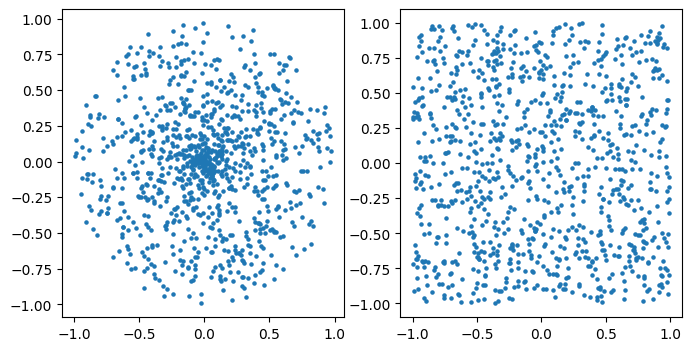

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].scatter(x_arr1, y_arr1, s=5)
axs[1].scatter(x_arr2, y_arr2, s=5)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


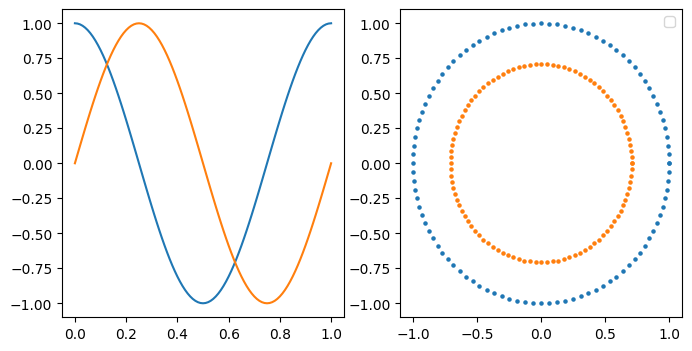

In [4]:
b = np.arange(0, 1.01, 0.01)

fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].plot(b, np.cos(b * 2*np.pi), label='cos')
axs[0].plot(b, np.sin(b * 2*np.pi), label='sin')
axs[1].scatter(np.cos(b * 2*np.pi), np.sin(b * 2*np.pi), s=5)
axs[1].scatter(np.cos(b * 2*np.pi) / np.sqrt(2), np.sin(b * 2*np.pi) / np.sqrt(2), s=5)
# axs[1].scatter(0.5*np.cos(b * 2*np.pi), 0.5*np.sin(b * 2*np.pi), s=5)
# axs[1].scatter(0.1*np.cos(b * 2*np.pi), 0.1*np.sin(b * 2*np.pi), s=5)
plt.legend()
plt.show()

In [5]:
# N_sets = 100
# sets_arr = []
# for j in range(N_sets):
#     N_points = 1000
#     x_y_arr1, x_y_arr2 = [[0, 0]] * N_points, [[0, 0]] * N_points
#     for i in range(N_points):
#         x1, y1 = generate1()
#         x_y_arr1[i][0] = x1
#         x_y_arr1[i][1] = y1
#         x2, y2 = generate2()
#         x_y_arr2[i][0] = x2
#         x_y_arr2[i][1] = y2
#     x_y_arr1.append(1)
#     x_y_arr2.append(2)
#     rand_1_2 = np.random.randint(1,3)
#     if rand_1_2 == 1:
#         sets_arr.append(x_y_arr1)
#     else:
#         sets_arr.append(x_y_arr2)

In [5]:
N_sets = 100
sets_arr = []
for j in range(N_sets):
    N_points = 1000
    x_y_arr1, x_y_arr2 = [], []
    for i in range(N_points):
        x1, y1 = generate1()
        x_y_arr1.append(x1)
        x_y_arr1.append(y1)
        x2, y2 = generate2()
        x_y_arr2.append(x2)
        x_y_arr2.append(y2)
    x_y_arr1.append(1)
    x_y_arr2.append(2)
    rand_1_2 = np.random.randint(1,3)
    if rand_1_2 == 1:
        sets_arr.append(x_y_arr1)
    else:
        sets_arr.append(x_y_arr2)

In [6]:
file = open("/home/opv002/py_notes/git_repos/ML_trainings/data/points_in_circle_data.txt", "w+")
file.truncate(0)
file_no_target = open("/home/opv002/py_notes/git_repos/ML_trainings/data/points_in_circle_data_no_target.txt", "w+")
file_no_target.truncate(0)

0

In [7]:
for line in sets_arr:
    file.writelines(' '.join([str(i) for i in line]) + '\n')
    file_no_target.writelines(' '.join([str(i) for i in line][:-1]) + '\n')
file.close()
file_no_target.close()

In [8]:
file = open("/home/opv002/py_notes/git_repos/ML_trainings/data/points_in_circle_data.txt", "r")
lines = []
for line in file.readlines():
    line_float = [float(i) for i in line.split(' ')]
    lines.append(line_float)

file_no_target = open("/home/opv002/py_notes/git_repos/ML_trainings/data/points_in_circle_data_no_target.txt", "r")
lines_no_target = []
for line in file_no_target.readlines():
    line_float = [float(i) for i in line.split(' ')]
    lines_no_target.append(line_float)

In [9]:
sets_arr_new = []
for line in lines:
    x_arr = [0] * ((len(line) - 1) // 2)
    y_arr = [0] * ((len(line) - 1) // 2)
    target_arr = [0] *  ((len(line) - 1) // 2)
    for i in range(0, len(line) - 1):
        if i % 2 == 0:
            x_arr[i // 2] = line[i]
        else:
            y_arr[i // 2] = line[i]
            target_arr[i // 2] = int(line[-1])
    sets_arr_new.append([x_arr, y_arr, target_arr])

In [32]:
real_ans = []
for line in lines:
    real_ans.append(line[-1])

In [10]:
sets_arr_no_target = []
for line in lines_no_target:
    x_arr = [0] * (len(line) // 2)
    y_arr = [0] * (len(line) // 2)
    for i in range(0, len(line)):
        if i % 2 == 0:
            x_arr[i // 2] = line[i]
        else:
            y_arr[i // 2] = line[i]
    sets_arr_no_target.append([x_arr, y_arr])

In [11]:
df_list = []
for i in range(0, len(sets_arr_new)):
    df_list.append(pd.DataFrame({'x': sets_arr_new[i][0], 'y': sets_arr_new[i][1], 'target': sets_arr_new[i][2]}))

In [12]:
df_list_no_target = []
for i in range(0, len(sets_arr_no_target)):
    df_list_no_target.append(pd.DataFrame({'x': sets_arr_no_target[i][0], 'y': sets_arr_no_target[i][1]}))

In [13]:
df_list[3]

,x,y,target
0,0.884608,-0.106920,2
1,-0.315684,-0.058425,2
2,0.829511,0.209271,2
3,0.843748,0.495873,2
4,-0.641564,0.690145,2
...,...,...,...
995,0.219947,0.213210,2
996,-0.509199,-0.999223,2
997,-0.938036,-0.889892,2
998,0.124560,0.960075,2


In [14]:
df_list_no_target[3]

,x,y
0,0.884608,-0.106920
1,-0.315684,-0.058425
2,0.829511,0.209271
3,0.843748,0.495873
4,-0.641564,0.690145
...,...,...
995,0.219947,0.213210
996,-0.509199,-0.999223
997,-0.938036,-0.889892
998,0.124560,0.960075


In [15]:
df_list_new = []
for df in df_list:
    df = df.assign(x2_plus_y2 = df['x']**2 + df['y']**2)
    df = df.assign(is_in = df['x2_plus_y2'] <= 1/np.sqrt(2))
    df_list_new.append(df)

In [16]:
df_list_no_target_new = []
for df in df_list_no_target:
    df = df.assign(x2_plus_y2 = df['x']**2 + df['y']**2)
    df = df.assign(is_in = df['x2_plus_y2'] <= 1/np.sqrt(2))
    df_list_no_target_new.append(df)

In [17]:
df_list_new[6]['is_in'].mean()

0.559

In [18]:
df_list_new[3]

,x,y,target,x2_plus_y2,is_in
0,0.884608,-0.106920,2,0.793963,False
1,-0.315684,-0.058425,2,0.103070,True
2,0.829511,0.209271,2,0.731883,False
3,0.843748,0.495873,2,0.957800,False
4,-0.641564,0.690145,2,0.887905,False
...,...,...,...,...,...
995,0.219947,0.213210,2,0.093835,True
996,-0.509199,-0.999223,2,1.257730,False
997,-0.938036,-0.889892,2,1.671820,False
998,0.124560,0.960075,2,0.937259,False


In [19]:
df_list_no_target_new[6]['is_in'].mean()

0.559

In [20]:
ans_list = []
for df in df_list_new:
    ans_list.append([df['is_in'].mean(), df['target'][0]])

In [21]:
ans_list

[[0.551, 2],
 [0.533, 2],
 [0.551, 2],
 [0.553, 2],
 [0.844, 1],
 [0.586, 2],
 [0.559, 2],
 [0.549, 2],
 [0.564, 2],
 [0.831, 1],
 [0.539, 2],
 [0.847, 1],
 [0.552, 2],
 [0.582, 2],
 [0.565, 2],
 [0.841, 1],
 [0.524, 2],
 [0.591, 2],
 [0.845, 1],
 [0.521, 2],
 [0.862, 1],
 [0.518, 2],
 [0.564, 2],
 [0.557, 2],
 [0.847, 1],
 [0.56, 2],
 [0.846, 1],
 [0.57, 2],
 [0.534, 2],
 [0.838, 1],
 [0.586, 2],
 [0.855, 1],
 [0.852, 1],
 [0.544, 2],
 [0.564, 2],
 [0.834, 1],
 [0.553, 2],
 [0.826, 1],
 [0.841, 1],
 [0.845, 1],
 [0.853, 1],
 [0.573, 2],
 [0.54, 2],
 [0.54, 2],
 [0.843, 1],
 [0.85, 1],
 [0.549, 2],
 [0.843, 1],
 [0.543, 2],
 [0.572, 2],
 [0.562, 2],
 [0.558, 2],
 [0.845, 1],
 [0.552, 2],
 [0.846, 1],
 [0.536, 2],
 [0.55, 2],
 [0.855, 1],
 [0.838, 1],
 [0.841, 1],
 [0.842, 1],
 [0.828, 1],
 [0.86, 1],
 [0.85, 1],
 [0.55, 2],
 [0.85, 1],
 [0.834, 1],
 [0.533, 2],
 [0.552, 2],
 [0.545, 2],
 [0.869, 1],
 [0.563, 2],
 [0.549, 2],
 [0.834, 1],
 [0.875, 1],
 [0.537, 2],
 [0.547, 2],
 [0.824, 

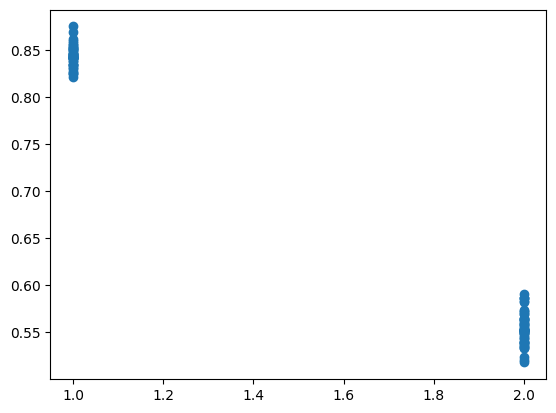

In [22]:
plt.scatter(np.array(ans_list).T[1], np.array(ans_list).T[0])
plt.show()

# ---------------------------- shorter code for files without target ----------------------------

In [ ]:
# sets_arr_no_target = []
# for line in lines_no_target:
#     x_arr = [0] * (len(line) // 2)
#     y_arr = [0] * (len(line) // 2)
#     for i in range(0, len(line)):
#         if i % 2 == 0:
#             x_arr[i // 2] = line[i]
#         else:
#             y_arr[i // 2] = line[i]
#     sets_arr_no_target.append([x_arr, y_arr])

In [33]:
ans_list_no_target = [0] * len(sets_arr_no_target)
for i in range(0, len(sets_arr_no_target)):
    x2_plus_y2 = np.array(sets_arr_no_target[i][1])**2 + np.array(sets_arr_no_target[i][0])**2
    is_in_mean = (x2_plus_y2 <= 1/np.sqrt(2)).mean()
    if is_in_mean <= 0.7:
        ans_list_no_target[i] = 2
    else:
        ans_list_no_target[i] = 1

In [34]:
(np.array(sets_arr_no_target[3][1])**2 + np.array(sets_arr_no_target[3][0])**2 <= 0.7).mean()

0.547

In [35]:
ans_list_no_target

[2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2]

In [26]:
np.array(ans_list).T[1]

array([2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 2.,
       2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 1., 2.,
       2., 1., 2., 1., 1., 1., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2.,
       2., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2.,
       2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2.])

In [27]:
accuracy_score(np.array(ans_list).T[1], ans_list_no_target)

1.0

In [28]:
file_ans = open("/home/opv002/py_notes/git_repos/ML_trainings/data/points_in_circle_ans.txt", "w+")

In [29]:
for a in ans_list_no_target:
    file_ans.writelines(str(a) + '\n')

In [30]:
file_ans.close()

In [36]:
accuracy_score(real_ans, ans_list_no_target)

1.0